In [1]:
!pip install matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("MSN.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"89,000","89,000","89,200","88,200",683.44K,0.11%
1,3/4/2019,"89,500","89,100","91,400","89,000",1.28M,0.56%
2,3/5/2019,"89,400","89,500","90,900","89,300",772.09K,-0.11%
3,3/6/2019,"90,000","90,000","90,200","89,300",695.52K,0.67%
4,3/7/2019,"90,000","90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,5/29/2024,"75,000","75,700","76,900","75,000",8.00M,-0.66%
1311,5/30/2024,"77,200","74,300","77,400","74,100",11.16M,2.93%
1312,5/31/2024,"76,600","78,000","78,400","76,600",5.59M,-0.78%
1313,6/3/2024,"77,700","77,300","78,500","76,800",6.57M,1.44%


In [5]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,89000.0,"89,000","89,200","88,200",683.44K,0.11%
1,2019-03-04,89500.0,"89,100","91,400","89,000",1.28M,0.56%
2,2019-03-05,89400.0,"89,500","90,900","89,300",772.09K,-0.11%
3,2019-03-06,90000.0,"90,000","90,200","89,300",695.52K,0.67%
4,2019-03-07,90000.0,"90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,2024-05-29,75000.0,"75,700","76,900","75,000",8.00M,-0.66%
1311,2024-05-30,77200.0,"74,300","77,400","74,100",11.16M,2.93%
1312,2024-05-31,76600.0,"78,000","78,400","76,600",5.59M,-0.78%
1313,2024-06-03,77700.0,"77,300","78,500","76,800",6.57M,1.44%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing arcording to 7:3

In [7]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [11]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315          84770.0
1316          84770.0
1317          84770.0
1318          84770.0
1319          84770.0
1320          84770.0
1321          84770.0
1322          84770.0
1323          84770.0
1324          84770.0
1325          84770.0
1326          84770.0
1327          84770.0
1328          84770.0
1329          84770.0
1330          84770.0
1331          84770.0
1332          84770.0
1333          84770.0
1334          84770.0
1335          84770.0
1336          84770.0
1337          84770.0
1338          84770.0
1339          84770.0
1340          84770.0
1341          84770.0
1342          84770.0
1343          84770.0
1344          84770.0
Predicted closing prices for the next 60 days:
      Predicted Close
1345          84770.0
1346          84770.0
1347          84770.0
1348          84770.0
1349          84770.0
1350          84770.0
1351          84770.0
1352          84770.0
1353          84770.0
1354

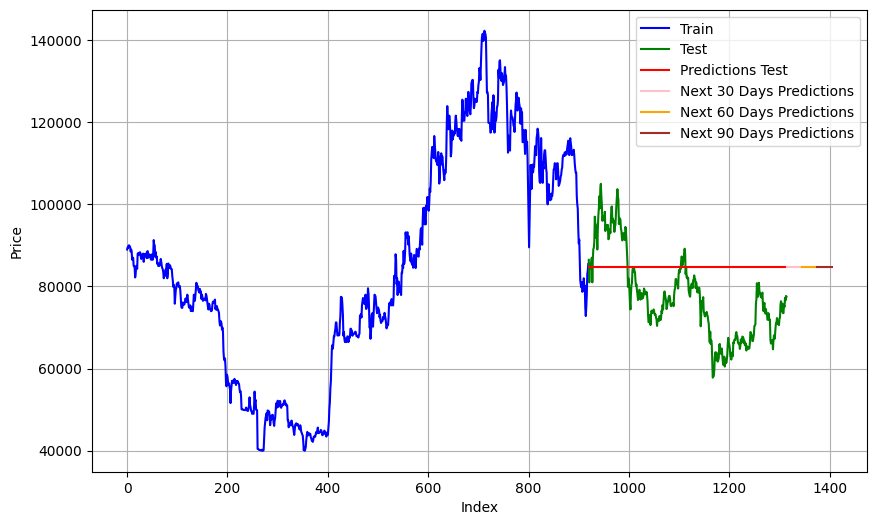

In [12]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 12807.809277195405
Testing MAE: 11199.822784810127
Testing MAPE: 15.43586985337656


<h1># Split the data into training, testing arcording to 8:2


In [14]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [15]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [18]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315          73600.0
1316          73600.0
1317          73600.0
1318          73600.0
1319          73600.0
1320          73600.0
1321          73600.0
1322          73600.0
1323          73600.0
1324          73600.0
1325          73600.0
1326          73600.0
1327          73600.0
1328          73600.0
1329          73600.0
1330          73600.0
1331          73600.0
1332          73600.0
1333          73600.0
1334          73600.0
1335          73600.0
1336          73600.0
1337          73600.0
1338          73600.0
1339          73600.0
1340          73600.0
1341          73600.0
1342          73600.0
1343          73600.0
1344          73600.0
Predicted closing prices for the next 60 days:
      Predicted Close
1345          73600.0
1346          73600.0
1347          73600.0
1348          73600.0
1349          73600.0
1350          73600.0
1351          73600.0
1352          73600.0
1353          73600.0
1354

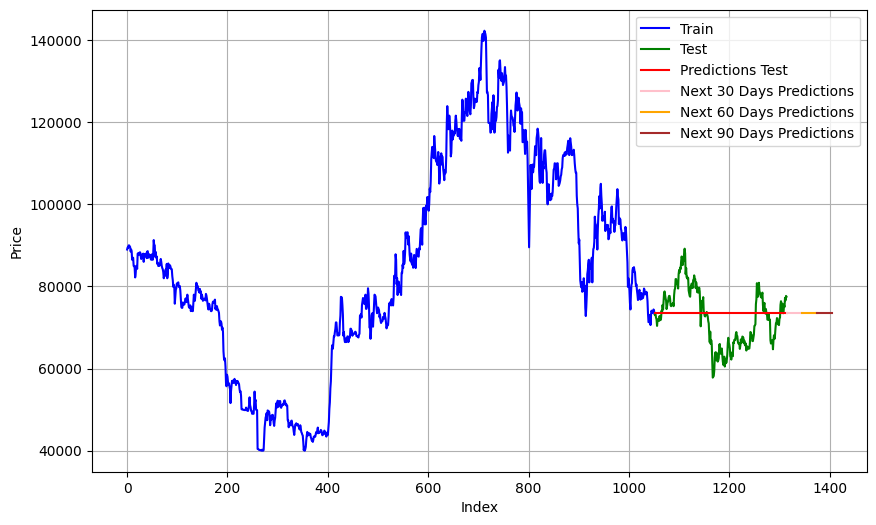

In [19]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 6948.416675515217
Testing MAE: 5820.152091254753
Testing MAPE: 8.2688025306966


<h1>Split the data into training, testing arcording to 9:1


In [21]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [22]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [25]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315          64630.0
1316          64630.0
1317          64630.0
1318          64630.0
1319          64630.0
1320          64630.0
1321          64630.0
1322          64630.0
1323          64630.0
1324          64630.0
1325          64630.0
1326          64630.0
1327          64630.0
1328          64630.0
1329          64630.0
1330          64630.0
1331          64630.0
1332          64630.0
1333          64630.0
1334          64630.0
1335          64630.0
1336          64630.0
1337          64630.0
1338          64630.0
1339          64630.0
1340          64630.0
1341          64630.0
1342          64630.0
1343          64630.0
1344          64630.0
Predicted closing prices for the next 60 days:
      Predicted Close
1345          64630.0
1346          64630.0
1347          64630.0
1348          64630.0
1349          64630.0
1350          64630.0
1351          64630.0
1352          64630.0
1353          64630.0
1354

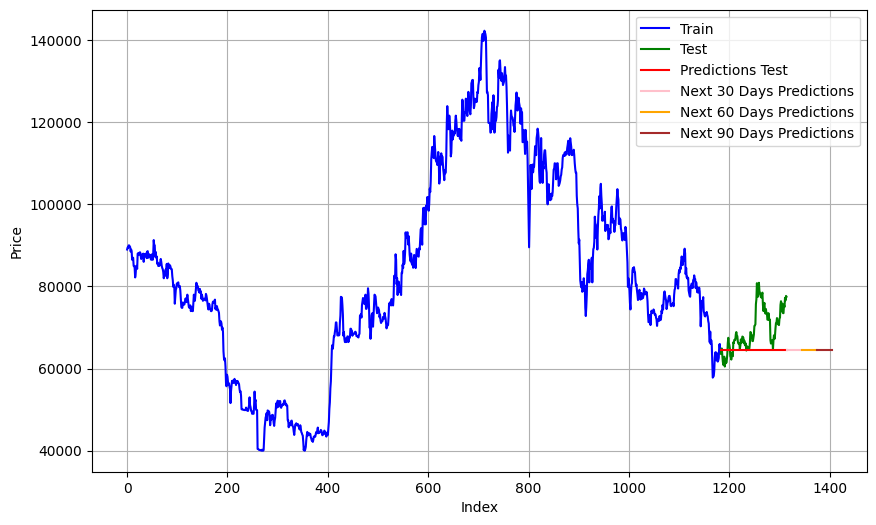

In [26]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 6973.044854685401
Testing MAE: 5355.606060606061
Testing MAPE: 7.329029023997759
